# Exploration on tmdb movies and tn movies budget dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
from sqlite3 import connect
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Import the movies data set
 
movies_df = pd.read_csv('../data/tmdb.movies.csv')
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# Import the budget data set

budget_df = pd.read_csv('../data/tn.movie_budgets.csv')
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
# merge both data set

new_movie_df = pd.concat([movies_df, budget_df], axis=1, join="inner")
new_movie_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#describe all the data set

new_movie_df.info(),new_movie_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5782 non-null   int64  
 1   genre_ids          5782 non-null   object 
 2   id                 5782 non-null   int64  
 3   original_language  5782 non-null   object 
 4   original_title     5782 non-null   object 
 5   popularity         5782 non-null   float64
 6   release_date       5782 non-null   object 
 7   title              5782 non-null   object 
 8   vote_average       5782 non-null   float64
 9   vote_count         5782 non-null   int64  
 10  id                 5782 non-null   int64  
 11  release_date       5782 non-null   object 
 12  movie              5782 non-null   object 
 13  production_budget  5782 non-null   object 
 14  domestic_gross     5782 non-null   object 
 15  worldwide_gross    5782 non-null   object 
dtypes: float64(2), int64(4),

(None,
        Unnamed: 0             id  popularity  vote_average    vote_count  \
 count  5782.00000    5782.000000  5782.00000   5782.000000   5782.000000   
 mean   2890.50000  124111.377551     3.40558      5.826946    243.961605   
 std    1669.26396  110792.705362     4.14639      1.694910   1086.366370   
 min       0.00000      27.000000     0.60000      0.000000      1.000000   
 25%    1445.25000   55880.750000     0.60325      5.000000      2.000000   
 50%    2890.50000   80273.500000     1.40000      6.000000      7.000000   
 75%    4335.75000  141421.750000     5.05275      6.900000     46.000000   
 max    5781.00000  605408.000000    50.28900     10.000000  22186.000000   
 
                 id  
 count  5782.000000  
 mean     50.372363  
 std      28.821076  
 min       1.000000  
 25%      25.000000  
 50%      50.000000  
 75%      75.000000  
 max     100.000000  )

#### The mean is approximate to the median, hence the distribution is Gaussian

In [6]:
# check the rows with the NaN

new_movie_df.isna().sum()

#data looks clean

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [7]:
# convert id values to genres

comment = """Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37"""
id_to_genre = {line.split(' ')[-1]:line.split(' ')[0].lower() for line in comment.split('\n')}

In [8]:
def convert_ids(line):
    #return type(line[1:-1].split(',')[0])
    return ','.join(sorted([id_to_genre.get(x.strip(), x.strip()) for x in line[1:-1].split(',')]))

In [9]:
# add the genre eqivalents to the id

new_movie_df['genre'] = new_movie_df.genre_ids.apply(convert_ids)

In [10]:
new_movie_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genre
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","adventure,family,fantasy"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","adventure,animation,family,fantasy"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","action,adventure,science"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","animation,comedy,family"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","action,adventure,science"


In [11]:
new_movie_df.production_budget = new_movie_df.production_budget.str.replace('$','').str.replace(',','')
new_movie_df.domestic_gross = new_movie_df.domestic_gross.str.replace('$','').str.replace(',','')
new_movie_df.worldwide_gross = new_movie_df.worldwide_gross.str.replace('$','').str.replace(',','')

In [12]:
new_movie_df = new_movie_df.drop_duplicates()

In [28]:
# convert each value data types into integers

new_movie_df['production_budget'] = new_movie_df['production_budget'].astype(object).astype(float)
new_movie_df['domestic_gross'] = new_movie_df['domestic_gross'].astype(object).astype(float)
new_movie_df['worldwide_gross'] = new_movie_df['worldwide_gross'].astype(object).astype(float)

In [14]:
# caculate the profit
new_movie_df['profit'] = new_movie_df['worldwide_gross'] - new_movie_df['production_budget']


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, 'comedy,fantasy,music'),
  Text(0.0, 0, 'action,drama,mystery,thriller'),
  Text(100.0, 0, 'action,adventure,comedy,horror'),
  Text(200.0, 0, 'comedy,music,tv'),
  Text(300.0, 0, 'comedy,drama,romance'),
  Text(400.0, 0, 'comedy,family,tv'),
  Text(500.0, 0, 'animation,drama,fantasy'),
  Text(600.0, 0, ''),
  Text(700.0, 0, '')])

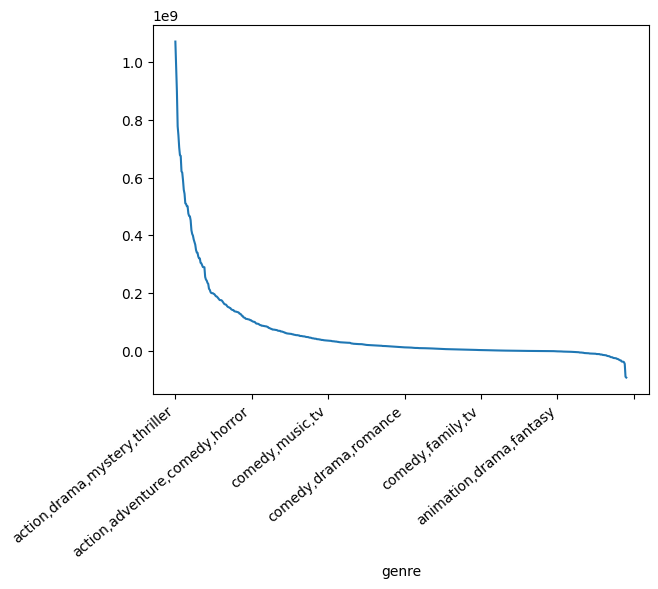

In [15]:
# The median profit grouped by genre
 
new_movie_df.groupby('genre').profit.median().sort_values(ascending=False).plot(kind='line')
plt.xticks(rotation=40, horizontalalignment='right')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, 'crime,drama,science,thriller'),
  Text(0.0, 0, 'action,drama,mystery,thriller'),
  Text(100.0, 0, 'action,adventure,animation,family,science'),
  Text(200.0, 0, 'action,documentary'),
  Text(300.0, 0, 'adventure,comedy,drama,thriller'),
  Text(400.0, 0, 'drama,music,war'),
  Text(500.0, 0, 'drama,history,horror'),
  Text(600.0, 0, ''),
  Text(700.0, 0, '')])

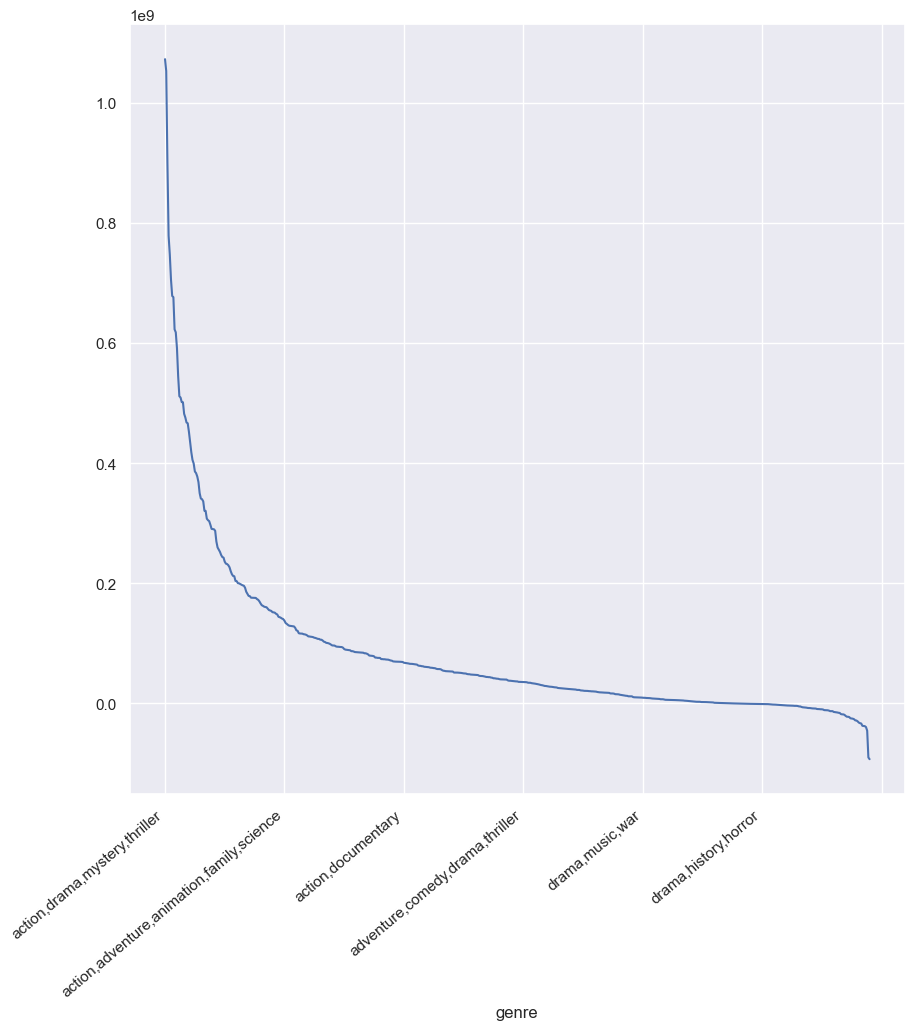

In [61]:
# The mean profit grouped by genre
 
new_movie_df.groupby('genre').profit.mean().sort_values(ascending=False).plot(kind='line')
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=40, horizontalalignment='right')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(-100.0, 0, 'drama,mystery,thriller,tv'),
  Text(0.0, 0, 'adventure,family,fantasy'),
  Text(100.0, 0, 'action,adventure,animation,science,war'),
  Text(200.0, 0, 'fantasy,horror,science'),
  Text(300.0, 0, 'horror,mystery,science'),
  Text(400.0, 0, 'adventure,comedy,drama,family,tv'),
  Text(500.0, 0, 'action,science,tv'),
  Text(600.0, 0, ''),
  Text(700.0, 0, '')])

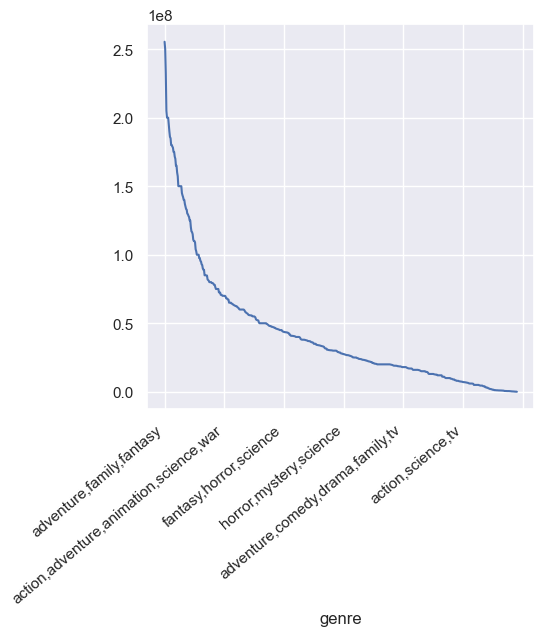

In [62]:
# median return by production 

new_movie_df.groupby('genre').production_budget.mean().sort_values(ascending=False).plot(kind='line')
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=40, horizontalalignment='right')

In [16]:
#splitting the genre and counting them

genre_split = new_movie_df.iloc[:50].genre.str.split(',').explode('genre').value_counts()
genre_split_df = genre_split.reset_index()
genre_split_df

,genre,count
0,action,22
1,adventure,19
2,comedy,16
3,family,15
4,thriller,14
5,drama,14
6,fantasy,13
7,animation,9
8,science,7
9,romance,7


### What top genre of movies is most popular?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'action'),
  Text(1, 0, 'adventure'),
  Text(2, 0, 'comedy'),
  Text(3, 0, 'family'),
  Text(4, 0, 'thriller'),
  Text(5, 0, 'drama'),
  Text(6, 0, 'fantasy'),
  Text(7, 0, 'animation'),
  Text(8, 0, 'science'),
  Text(9, 0, 'romance'),
  Text(10, 0, 'crime'),
  Text(11, 0, 'mystery'),
  Text(12, 0, 'horror'),
  Text(13, 0, 'history'),
  Text(14, 0, 'music')])

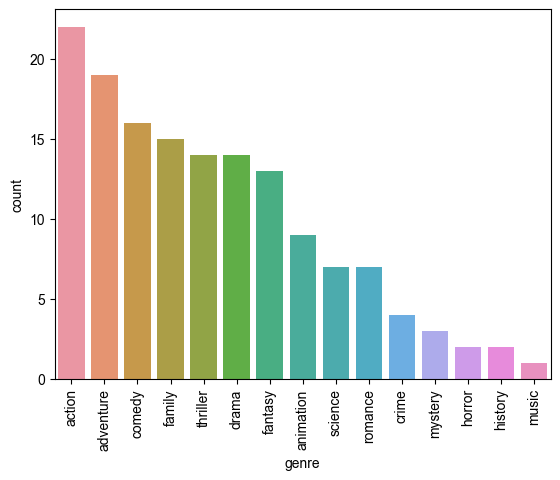

In [17]:
#plot the genre and count to know the most popular genre

sns.barplot(data = genre_split_df, x = 'genre', y='count')
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=90)

In [18]:
top_50 = new_movie_df.sort_values(by='profit', ascending = False)[:50]
bottom_50 =  new_movie_df.sort_values(by='profit', ascending = False)[-50:]

### What top genre of movies makes the most profit out of 50 movies

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'adventure,family,fantasy'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'action,adventure,fantasy,science'),
  Text(3, 0, 'action,drama,mystery,thriller'),
  Text(4, 0, 'action,animation,mystery'),
  Text(5, 0, 'action,comedy,crime,thriller'),
  Text(6, 0, 'comedy,drama,romance'),
  Text(7, 0, 'action,comedy,romance'),
  Text(8, 0, 'adventure,animation,comedy,family'),
  Text(9, 0, 'drama,romance'),
  Text(10, 0, 'drama,romance,science'),
  Text(11, 0, 'documentary'),
  Text(12, 0, 'animation,comedy,family'),
  Text(13, 0, 'comedy,family'),
  Text(14, 0, 'comedy,romance'),
  Text(15, 0, 'drama,thriller'),
  Text(16, 0, 'action,adventure,science'),
  Text(17, 0, 'comedy,drama'),
  Text(18, 0, 'action,comedy,family'),
  Text(19, 0, 'comedy,horror'),
  Te

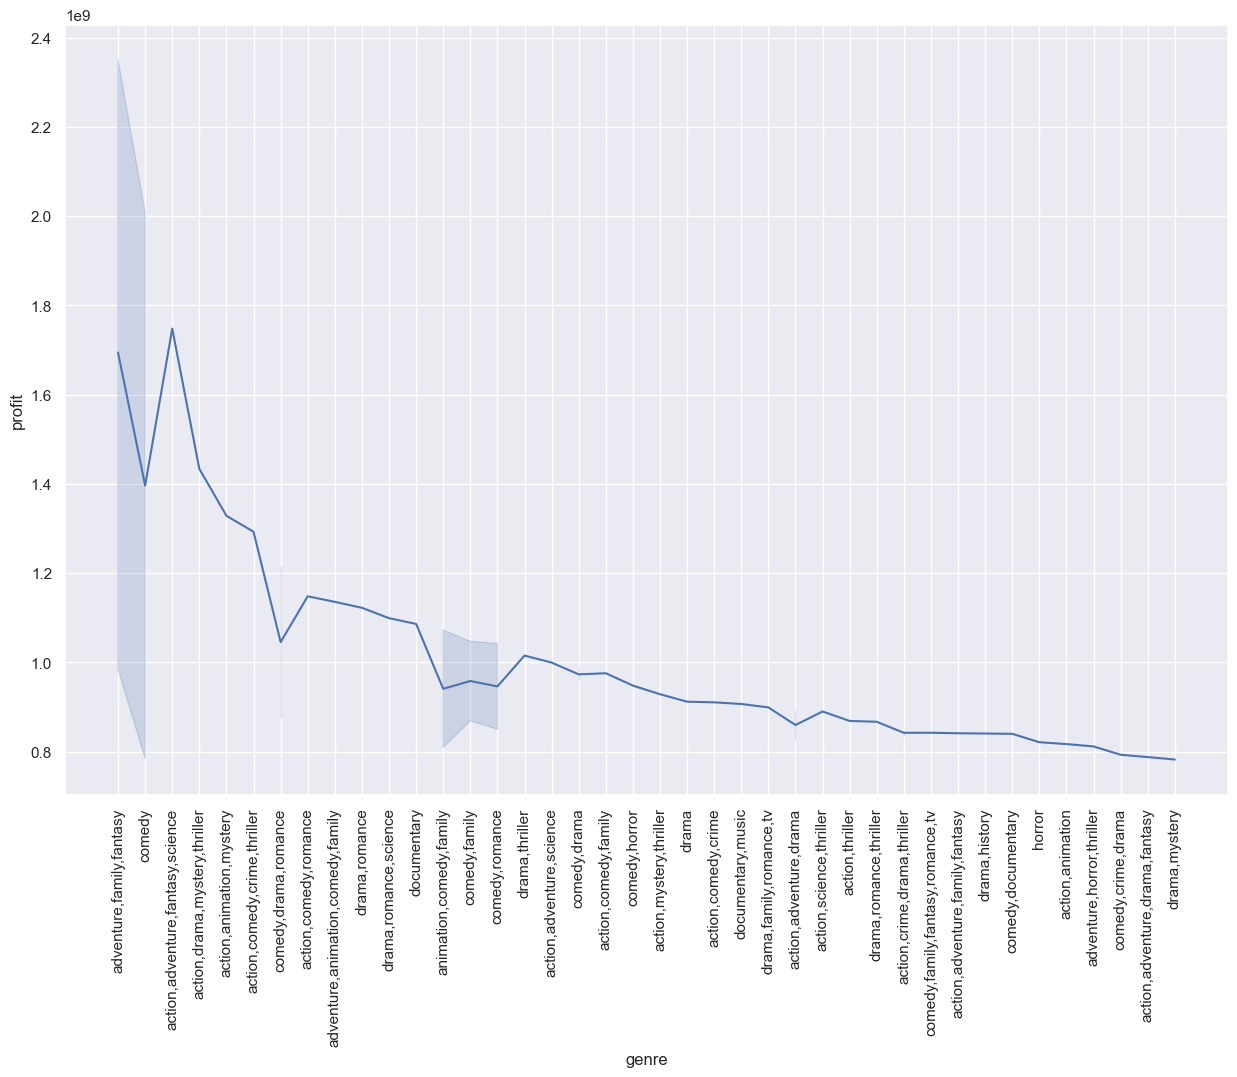

In [25]:
sns.lineplot(data = top_50, x = top_50.genre, y=top_50.profit)
sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(rotation=90)

# Recommendations

## EDA Recommendations

#### 1. If looking at return on production budget, ***Horror, Thriller***, looks best.
#### 2. If looking at overall profit, ***Action,  Adventure***, looks best 

## Statistical Recommendation at X% confidence level

#### 3. Keep production budget approximately $100m and $40m